In [36]:
import matplotlib.pyplot as plt
from scipy import optimize,  interpolate, integrate, misc
import seaborn as sns
import numpy as np
import pandas as pd
from sympy import *

%matplotlib inline

In [33]:
pdf = pd.read_csv('file_f.csv', index_col = 0, encoding='unicode-escape')
pdg = pd.read_csv('file_g.csv', index_col = 0, encoding='unicode-escape')

## Usar SEABORN para graficar

In [41]:
df =pdf+pdg

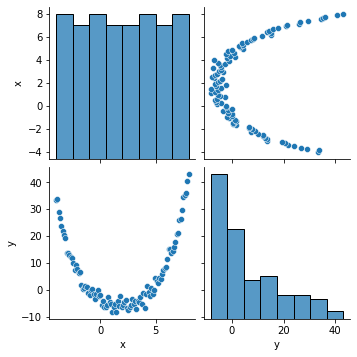

In [42]:
sns.pairplot(df)

## Leer archivos con PANDAS y almacenar

In [ ]:
pd.read_csv('file_f.csv') #Para leer archivos con Pandas

In [ ]:
pdf.head()

In [4]:
pdg.head()

,x,y
0,-2.000000,43.800852
1,-1.939394,42.049952
2,-1.878788,38.473135
3,-1.818182,36.070861
4,-1.757576,34.152866


In [5]:
df5 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

In [6]:
df5.to_csv("prueba.csv") #Para almacenar con Pandas

## Graficar archivos

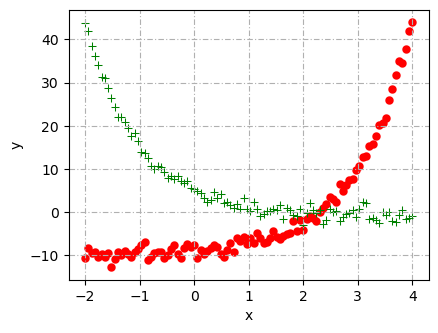

In [7]:
fig_1 = plt.figure(figsize=(4,3), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_xlabel('x') #This is how you add labels to the axes
axes_1.set_ylabel('y')
axes_1.scatter(pdf.x,pdf.y, color='r', lw=.05) #To plot the axes, and a label generated
axes_1.scatter(pdg.x,pdg.y,marker='+' , color='g', lw=.75) 
axes_1.grid(True, dashes=(5,2,1,2))

## Sumar componentes y's y graficar

In [8]:
df_suma= pdf.y+pdg.y
df_suma

0     33.239017
1     33.818099
2     28.938182
3     26.829525
4     23.833050
        ...    
95    34.389177
96    35.173566
97    36.163755
98    40.640143
99    43.080868
Name: y, Length: 100, dtype: float64

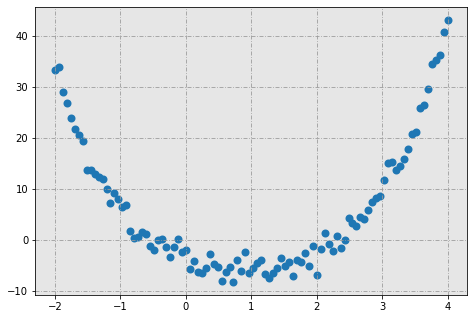

In [9]:
fig_suma = plt.figure(figsize=(6,4))
axes_suma = fig_suma.add_axes([0,0,1,1])
axes_suma.scatter(pdf.x, df_suma, lw=2) 

#Add a grid
axes_suma.grid(True, color='0.6', dashes=(5,2,1,2))

#Change the background color 
axes_suma.set_facecolor('.9')

## Ajustar una funcion cuadratica y encontrar coeficientes

In [10]:
## Ajustar una funcion quadratica a la suma
def f(t, a, b, c):
    return a*t**2 + b*t + c #curvefit

Para el ajuste de los datos al modelo cuadrático de regresión construímos la siguiente tabla, sin embargo se encontró un método más facil para encontrar los coeficientes, por lo cual ya no se continuo por este método.

In [11]:
df_ajustecuadratico_f = pd.DataFrame({'x': pdf.x, 'y': pdf.y, 'x^2': (pdf.x)**2, 'x^3': (pdf.x)**3, 'x^4': (pdf.x)**4,
                                    'x*y': pdf.x*pdf.y, 'x^2y':((pdf.x)**2)*pdf.y,'y^2': (pdf.y)**2})

df_ajustecuadratico_f

,x,y,x^2,x^3,x^4,x*y,x^2y,y^2
0,-2.000000,-10.561835,4.000000,-8.000000,16.000000,21.123670,-42.247339,111.552354
1,-1.939394,-8.231853,3.761249,-7.294543,14.146993,15.964807,-30.962049,67.763412
2,-1.878788,-9.534953,3.529844,-6.631828,12.459798,17.914154,-33.656895,90.915324
3,-1.818182,-9.241336,3.305785,-6.010518,10.928215,16.802428,-30.549870,85.402283
4,-1.757576,-10.319815,3.089073,-5.429279,9.542369,18.137857,-31.878658,106.498586
...,...,...,...,...,...,...,...,...
95,3.757576,35.020698,14.119376,53.054623,199.356767,131.592925,494.470384,1226.449269
96,3.818182,34.630118,14.578512,55.663411,212.533024,132.224086,504.855601,1199.245055
97,3.878788,37.781872,15.044995,58.356346,226.351887,146.547866,568.428087,1427.469831
98,3.939394,41.869477,15.518825,61.134764,240.833917,164.940363,649.765067,1753.053089


In [12]:
pars, cov = optimize.curve_fit(f=f, xdata=pdf.x, ydata=df_suma)
pars

array([ 4.55037324, -7.95814614, -4.55137115])

In [13]:
cov

array([[ 0.00885751, -0.01771503, -0.01825184],
       [-0.01771503,  0.05711103,  0.01482271],
       [-0.01825184,  0.01482271,  0.12564778]])

## GRaficar promedios y matriz de covarianza

In [14]:
matriz = pd.DataFrame(cov, columns=['mean_1', 'mean_2','mean_3'], index=[pars])
matriz

,mean_1,mean_2,mean_3
4.550373,0.008858,-0.017715,-0.018252
-7.958146,-0.017715,0.057111,0.014823
-4.551371,-0.018252,0.014823,0.125648


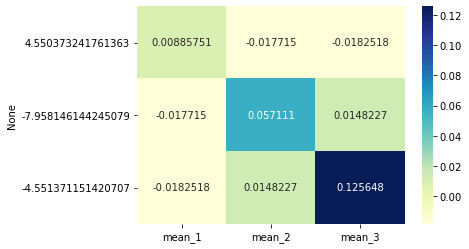

In [38]:
sns.heatmap(matriz, annot=True, fmt='g', cmap="YlGnBu")
plt.show()

In [16]:
#Promedios

print(pars)


[ 4.55037324 -7.95814614 -4.55137115]


## Graficar mejor ajuste de la cuadratica

Se puede graficar por polinomios de distintos grados

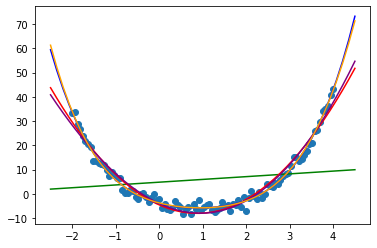

In [17]:
#fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(pdf.x, df_suma, 1))
model2 = np.poly1d(np.polyfit(pdf.x, df_suma, 2))
model3 = np.poly1d(np.polyfit(pdf.x, df_suma, 3))
model4 = np.poly1d(np.polyfit(pdf.x, df_suma, 4))
model5 = np.poly1d(np.polyfit(pdf.x, df_suma, 5))

#create scatterplot
polyline = np.linspace(-2.5, 4.5)
plt.scatter(pdf.x, df_suma)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')
plt.show()

Pero e mejor ajuste es con la función **fit_curve**, con la cual habíamos encontrado los coeficientes

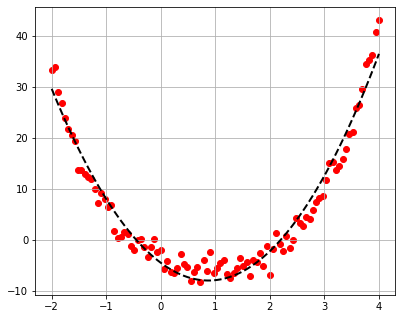

In [18]:
fig_ajuste = plt.figure(figsize=(5,4))
axes_ajuste = fig_ajuste.add_axes([0,0,1,1])

axes_ajuste.plot(pdf.x, f(pdf.x, *pars), linestyle='--', linewidth=2, color='black')
axes_ajuste.scatter(pdf.x, df_suma, color='r')

#Grid 
axes_ajuste.grid(True)

#Axis limits
#axes_ajuste.set_ylim([-15,40])

## El mejor ajuste convertir a una funcion

In [19]:
## Ajustar una funcion quadratica a la suma
def f_coeficientes(x):
    return 4.55037324*x**2 - 7.9581461*x - 4.55137115

## Encontrar raices

In [20]:
raices = np.roots(pars)
raices

array([ 2.20293836, -0.45403872])

In [21]:
#Para corroborrarlo
print(f_coeficientes(2.20293836),f_coeficientes(-0.45403872))

9.390316257906761e-08 3.73052086999337e-08


## Encontrar minimo

In [22]:
np.amin(pars)

-7.958146144245079

## Calcular derivadas en raices

In [23]:
t = Symbol('t')
y = 4.55037324*t**2 - 7.9581461*t - 4.55137115
yprime = y.diff(t)
print(yprime)

9.10074648*t - 7.9581461


In [24]:
def deriv(x):
    return 9.10074648*x - 7.9581461

#Corroboramos 
deriv(raices)

array([ 12.09023742, -12.09023734])

In [25]:
#confirmamos
misc.derivative(f_coeficientes,raices)

array([ 12.09023742, -12.09023734])

## Graficar tangentes a raices y funcion 

Text(1.2, -16, '(0.874,-16.062)')

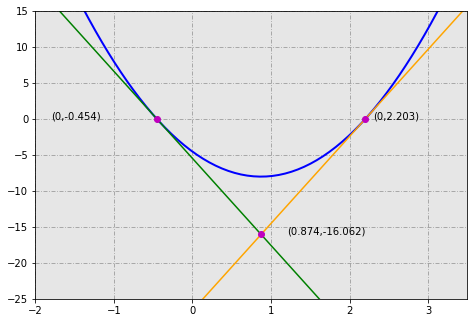

In [26]:
fig_tan = plt.figure(figsize=(6,4))

# evaluation of the function
x = np.linspace(-2,4,150)
y = f_coeficientes(x)

tan = deriv(raices[0])*(x-raices[0])  # tangent
tan1 = deriv(raices[1])*(x-raices[1])  # tangent

axes_tan = fig_tan.add_axes([0,0,1,1])
axes_tan.plot(x,y,'b', lw=2)
axes_tan.plot(x,tan,'orange')
axes_tan.plot(raices[0],f_coeficientes(raices[0]),'om')

axes_tan.plot(x,tan1,'g')
axes_tan.plot(raices[1],f_coeficientes(raices[1]),'om')

#Punto de interseccion
#Para el punto de interseccion
x = Symbol('x')
y = deriv(raices[0])*(x-raices[0]) - deriv(raices[1])*(x-raices[1])
z = solve(y,x)
w = deriv(raices[0])*(z-raices[0])
axes_tan.plot(z,w,'om')


#Add a grid
axes_tan.grid(True, color='0.6', dashes=(5,2,1,2))

#Change the background color 
axes_tan.set_facecolor('.9')

#Axis limits
axes_tan.set_xlim([-2,3.5])
axes_tan.set_ylim([-25,15])

#Text
axes_tan.text(-1.8,0,'(0,-0.454)')
axes_tan.text(2.3,0,'(0,2.203)')
axes_tan.text(1.2,-16,'(0.874,-16.062)')

In [27]:
print(z,w)

[0.874449826705784] [-16.0617417773622]


## Graficar area entre parabola y tangentes

(-20.0, 5.0)

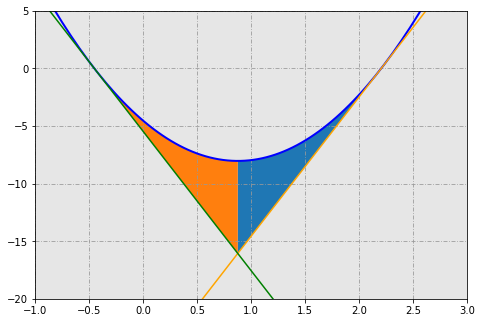

In [28]:
fig_tan = plt.figure(figsize=(6,4))

# evaluation of the function
x = np.linspace(-2,4,150)
y = f_coeficientes(x)

tan = deriv(raices[0])*(x-raices[0])  # tangent
tan1 = deriv(raices[1])*(x-raices[1])  # tangent

axes_tan = fig_tan.add_axes([0,0,1,1])
axes_tan.plot(x,y,'b', lw=2)
axes_tan.plot(x,tan,'orange')

axes_tan.plot(x,tan1,'g')

x1 = np.linspace(0.874449826705784,raices[0],150)
y1 = f_coeficientes(x1)
tan2 = deriv(raices[0])*(x1-raices[0])  # tangent

x2 = np.linspace(0.874449826705784,raices[1],150)
y2 = f_coeficientes(x2)
tan3 = deriv(raices[1])*(x2-raices[1])  # tangent

axes_tan.fill_between(x1,tan2, y1)
axes_tan.fill_between(x2,tan3, y2)


#Add a grid
axes_tan.grid(True, color='0.6', dashes=(5,2,1,2))

#Change the background color 
axes_tan.set_facecolor('.9')

#Axis limits
axes_tan.set_xlim([-1,3])
axes_tan.set_ylim([-20,5])


## Encotrar area total 

In [29]:
x = Symbol('x')
tan = deriv(raices[0])*(x-raices[0])  # tangent
tan1 = deriv(raices[1])*(x-raices[1])  # tangent
y = f_coeficientes(x)

area_1 = integrate(y - tan, (x, 0.874449826705784, raices[0]))
area_2 = integrate(y - tan1, (x, raices[1], 0.874449826705784))

area_total =area_1+area_2
area_total

7.11261337602824